<a href="https://colab.research.google.com/github/emerenan/analysing_police_activity/blob/master/police_activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Apagando colunas null!
-----------------------------------------------------------------------
(91741, 13)
(86536, 13)
Apagando linhas Null com base na coluna driver_gender!
-----------------------------------------------------------------------
Tratamento de tipos de dados do Dataframe.
-----------------------------------------------------------------------
Abordagens em Brancos
Citation            0.902263
Warning             0.057508
Arrest Driver       0.024018
No Action           0.007031
N/D                 0.006433
Arrest Passenger    0.002748
Name: stop_outcome, dtype: float64


Abordagens em Negros
Citation            0.857224
Warning             0.065120
Arrest Driver       0.054294
N/D                 0.008547
Arrest Passenger    0.008303
No Action           0.006512
Name: stop_outcome, dtype: float64
-----------------------------------------------------------------------
Violações do gênero Masculino
Speeding               0.522243
Moving violation       0.206144
Equipment 

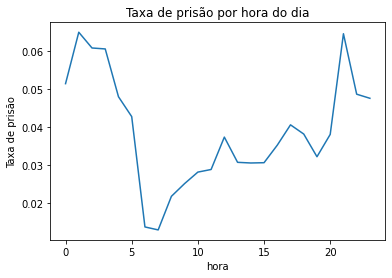

-----------------------------------------------------------------------


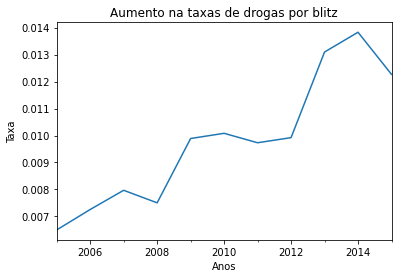

-----------------------------------------------------------------------


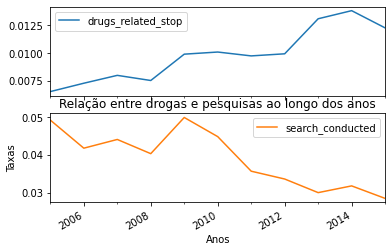

-----------------------------------------------------------------------


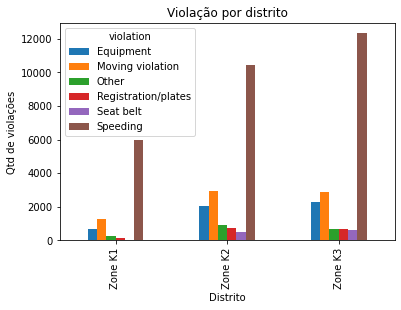

-----------------------------------------------------------------------
Antes
['0-15 Min' '16-30 Min' '30+ Min']
Depois
[ 8 23 45]


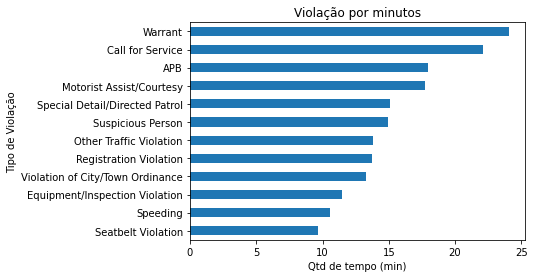

In [40]:
import pandas as pd
import matplotlib.pyplot as plt


# Método para leitura dos dados
def readfile(path):
    """ Método para ler os dados do arquivo e retornar um dataframe.
    Args: \n
        path: localização do arquivo que será lido. \n

    Returns: \n
        Dataframe contendo os dados para analise.

    Raises: \n
        ParserError: retorna as linhas que não puderam ser lidas.
    """

    try:
        df = pd.read_csv(path, error_bad_lines=False, warn_bad_lines=True, parse_dates=True, infer_datetime_format=True)
       
        #print(df.head())
        #print('-----------------------------------------------------------------------')
        #print(df.isnull().sum())
        #print('-----------------------------------------------------------------------')
        #print(df.info())
        #print('-----------------------------------------------------------------------')
        
        return df
    except pd.io.common.ParserError:
        print("Dados não puderam ser lidos")

def plotting(serie, labelx, labely, titulo, sub, tipo):
    """metodo para potagem de graficos a partir de series 
    Args:\n
        serie: pandas df criado a partir de valores agrupados (group by) de um dataframe Base. \n
        labelx: título do eixo x no formato string. \n
        labely: título do eixo y no formato string. \n
        titulo: título do gráfico no formato string. \n
        sub: se o grafico terá subplot. Formato bool.
    """
    if tipo == 0:
        serie.plot(subplots=sub, kind='line')
        plt.xlabel(labelx)
        plt.ylabel(labely)
        plt.title(titulo)
        plt.show()
    else:
        serie.plot(subplots=sub, kind=tipo)
        plt.xlabel(labelx)
        plt.ylabel(labely)
        plt.title(titulo)
        plt.show()
# lendo o arquivo e salvando na variavel data
data = readfile('/content/police.csv')

dict = {}
for label, entry in data.isnull().sum().items():
    # Salvando a forma do dataframe na variavel t
    t = data.shape
    # Salvando a qtd de linhas na variavel rows
    rows = t[0]

    if entry == rows or entry >= rows/2:
        data.drop(label, axis='columns', inplace=True)
        if label in dict.keys():
            dict[label] += "Deletada"
        else:
            dict[label] = "Deletada"
"""
for key, value in dict.items():
    if value == 0:
        print("Não houve colunas deletadas!")
    else:
        print(key, ": ", value)
"""
print('Apagando colunas null!')
print('-----------------------------------------------------------------------')
# Apagando todas as linhas do dataframe, com base nas linhas NUll da coluna driver_gender
print(data.shape) #antes de apagar
data.dropna(subset=['driver_gender'], inplace=True)
print(data.shape) #depois de apagado
print('Apagando linhas Null com base na coluna driver_gender!')
print('-----------------------------------------------------------------------')

# Analisando os tipos de dados do Dataframe para alterar o dtype
data.is_arrested = data.is_arrested.astype('bool')

# combinando stop_date com stop_time e convertendo para string
dates = data.stop_date.str.cat(data.stop_time, sep=' ')

# Criando a coluna stop_datetime e convertendo os valores para datetime
data['stop_datetime'] = pd.to_datetime(dates)

# Trocando a coluna stop_datetime como index do dataframe
data.set_index('stop_datetime', inplace=True)

print('Tratamento de tipos de dados do Dataframe.')
print('-----------------------------------------------------------------------')

# Contabilizando o resultado das abordagens policiais em porcentagem
data.stop_outcome.value_counts(normalize=True)

# Contabilizando os tipos de motoristas
data.driver_race.value_counts()

# Criação de variaveis para cada tipo de motorista
white = data[data.driver_race == "White"]
black = data[data.driver_race == "Black"]
hispanic = data[data.driver_race == "Hispanic"]
asian = data[data.driver_race == "Asian"]
others = data[data.driver_race == "Other"]

# Comparando os resultados das abordagens por grupo
print("Abordagens em Brancos")
#variavel.['coluna_do_df'].values_count(normalize=True)
print(white.stop_outcome.value_counts(normalize=True))
print("\n")
print("Abordagens em Negros")
print(black.stop_outcome.value_counts(normalize=True))
print('-----------------------------------------------------------------------')
# criação de variaveis para cada gênero de motorista
male = data[data.driver_gender == 'M']
female = data[data.driver_gender == 'F']

# Comparando os resultados das voiolações por genero
print("Violações do gênero Masculino")
print(male.violation.value_counts(normalize=True))
print('\n')
print("Violações do gênero Feminino")
print(female.violation.value_counts(normalize=True))
print('-----------------------------------------------------------------------')
# Criação de variavel para filtro por genero e violação de acesso de velocidade
male_arrested = data[(data.driver_gender == 'M') & (data.violation == 'Speeding')]
female_arrested = data[(data.driver_gender == 'F') & (data.violation == 'Speeding')]

# Comparando os resultados das voiolações
print("Excesso velocidade por homens presos")
print(male_arrested.stop_outcome.value_counts(normalize=True))
print('\n')
print("Excesso velocidade por mulheres presa")
print(female_arrested.stop_outcome.value_counts(normalize=True))
print('-----------------------------------------------------------------------')

# comparação booleana das prisões (is_arrested) por genero e distrito
data[data.district == 'Zone K1'].is_arrested.mean() # taxa na zona K1

district_driver_arrested = data.groupby(by=['district', 'driver_gender']).is_arrested.mean()

# Comparação da pesquisa de conduta por violação e genero do motorista
print(data.groupby(by=['violation', 'driver_gender']).search_conducted.mean())
print('-----------------------------------------------------------------------')

# Analise da hora do dia que há mais prisões
# Sendo: 0 - meia-noite, 12 - meio-dia, 23 = 11 pm
taxa_prisão_hora = data.groupby(data.index.hour).is_arrested.mean()

plotting(taxa_prisão_hora, "hora", 'Taxa de prisão', "Taxa de prisão por hora do dia", False, 0)
print('-----------------------------------------------------------------------')
# 6 - Verificar se o aumento na batidas está relacionado com drogas, mas fazendo uma amostra por anos usando o resample('A')
annual_drug_rate = data.drugs_related_stop.resample('A').mean()

plotting(annual_drug_rate, 'Anos', 'Taxa', 'Aumento na taxas de drogas por blitz', False, 0)
print('-----------------------------------------------------------------------')
# 6.1 Comparar o aumento da taxa de drogas com pesquisas realizadas amostrando por anos
annual_search_rate = data.search_conducted.resample('A').mean()
annual = pd.concat([annual_drug_rate, annual_search_rate], axis='columns')

plotting(annual, 'Anos', 'Taxas', 'Relação entre drogas e pesquisas ao longo dos anos', True, 0)
print('-----------------------------------------------------------------------')

# 6.2 Registros de violação de transito por distrito
all_zones = pd.crosstab(data.district, data.violation)

z1_z3 = all_zones.loc['Zone K1': 'Zone K3']

# Pode fazer o grafico emplilhado com o parametro stacked=True
plotting(z1_z3, 'Distrito', 'Qtd de violações', 'Violação por distrito', False, 'bar')
print('-----------------------------------------------------------------------')

# 6.3 - Analisar quanto tempo pode ficar detido por uma violação
print('Antes')
print(data.stop_duration.unique()) # vendo os valores para cada tipo de parada da coluna

# criando uma dicionario para alterar os valores de cada tipo de tempo parado de string para inteiro
# sendo '0-15 Min' :8 minutos,  '16-30 Min': 23 minutos, '30+ Min' :45 minutos
mapping = {'0-15 Min' :8,  '16-30 Min': 23, '30+ Min' :45}

# criando uma coluna nova para salvar os valores em inteiros
data['stop_minutes'] = data.stop_duration.map(mapping)
print('Depois')
print(data.stop_minutes.unique())

# criando uma variavel para salvar os dados de violação por minutos
stop_length = data.groupby('violation_raw').stop_minutes.mean()
stop_length_ordered = stop_length.sort_values()
plotting(stop_length_ordered, 'Qtd de tempo (min)', 'Tipo de Violação', 'Violação por minutos', False, 'barh')
